In [4]:
from tifffile import imread, imwrite
import os
from os.path import exists
import cv2
from matplotlib import cm
from matplotlib import colormaps
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [5]:
um_per_pixel = 0.117
s_per_frame = 2
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/paper_figure_plots/Aug24_new_Figs/traj_overlaid_with_nanodomains"
os.chdir(folder_save)

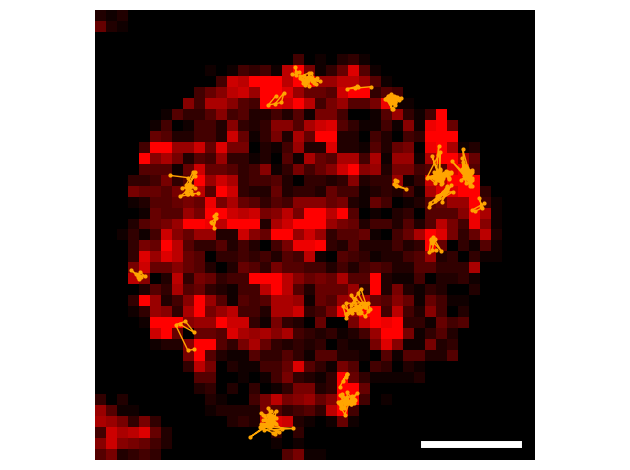

In [18]:
# load dataset
# fname_csv = "SPT_results_AIO-20230928-FOV-4-condensateID-46-left.csv"
fname_csv = "SPT_results_AIO-20230928-FOV-2-condensateID-77-right.csv"
# fname_csv = "SPT_results_AIO-20230928-FOV-5-condensateID-78-right.csv"
df = pd.read_csv(fname_csv)
# fname_img = "20230928-FOV-4-condensateID-46-left-PAINT.tif"
fname_img = "20230928-FOV-2-condensateID-77-right-PAINT.tif"
# fname_img = "20230928-FOV-5-condensateID-78-right-PAINT.tif"
img = imread(fname_img)

# color
# cmap_color_end = "#00FFFF"
cmap_color_end = "red"
cmap_color_start = "black"
cmap_name = "cmap"
cmap_img = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

df_plot = df[df["loglog_fit_R2"] > 0.5]
df_plot = df_plot[df_plot["alpha"] > 0]
df_plot = df_plot[df_plot["alpha"] < 1.3]

sample_size = 20
plt.figure()
plt.imshow(
    img,
    vmin=0,
    vmax=15,
    cmap=cmap_img,
)
df_plot = df_plot.sort_values(
    by=["alpha", "mean_stepsize_nm", "N_steps"], ascending=[True, True, False]
)
for _, df_current in df_plot.iloc[:sample_size].iterrows():
    array_like_string = df_current["list_of_x"]
    x = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    array_like_string = df_current["list_of_y"]
    y = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    plt.plot(
        y,
        x,
        "-o",
        color="orange",
        lw=1,
        markersize=2,
    )

# df_plot = df_plot[df_plot["alpha"] < 1.2]
# df_plot = df_plot.sort_values(
#     by=["N_steps", "mean_stepsize_nm", "alpha"], ascending=[True, False, False]
# )
# for _, df_current in df_plot.iloc[:sample_size].iterrows():
#     array_like_string = df_current["list_of_x"]
#     x = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
#     array_like_string = df_current["list_of_y"]
#     y = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
#     plt.plot(
#         y,
#         x,
#         "-o",
#         color="white",
#         lw=1,
#         markersize=2,
#     )

# # scale bar
scale_bar_offset = 0
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
base_x = img.shape[0] - scalebar_length_pxl - 3
base_y = img.shape[1] - 1
plt.plot(
    [
        base_x + scale_bar_offset,
        base_x + scale_bar_offset + scalebar_length_pxl,
    ],
    [base_y + scale_bar_offset, base_y + scale_bar_offset],
    "-",
    color="white",
    lw=5,
)
plt.axis("equal")
plt.axis("off")
plt.tight_layout()
fname_save = fname_csv[:-4] + "-traj_overlaid_nanodomain-RNA.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=600)

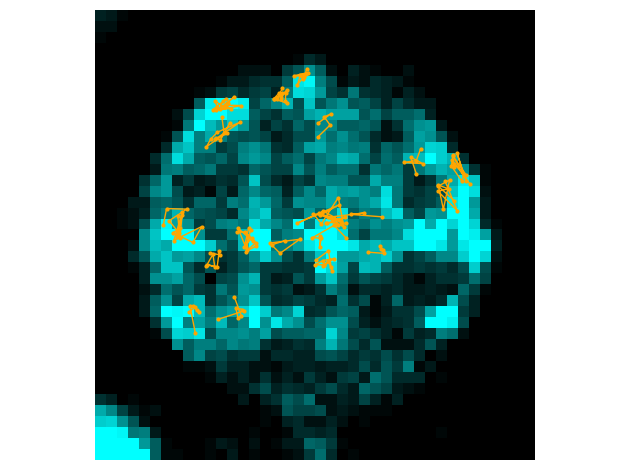

In [17]:
# load dataset
# fname_csv = "SPT_results_AIO-20230928-FOV-4-condensateID-46-left.csv"
fname_csv = "SPT_results_AIO-20230928-FOV-2-condensateID-77-left.csv"
# fname_csv = "SPT_results_AIO-20230928-FOV-5-condensateID-78-right.csv"
df = pd.read_csv(fname_csv)
# fname_img = "20230928-FOV-4-condensateID-46-left-PAINT.tif"
fname_img = "20230928-FOV-2-condensateID-77-left-PAINT.tif"
# fname_img = "20230928-FOV-5-condensateID-78-right-PAINT.tif"
img = imread(fname_img)

# color
cmap_color_end = "#00FFFF"
# cmap_color_end = "red"
cmap_color_start = "black"
cmap_name = "cmap"
cmap_img = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

df_plot = df[df["loglog_fit_R2"] > 0.5]
df_plot = df_plot[df_plot["alpha"] > 0]
df_plot = df_plot[df_plot["alpha"] < 1.3]

sample_size = 20
plt.figure()
plt.imshow(
    img,
    vmin=0,
    vmax=30,
    cmap=cmap_img,
)
df_plot = df_plot.sort_values(by=["alpha", "mean_stepsize_nm", "N_steps"], ascending=[True, True, False])
for _, df_current in df_plot.iloc[:sample_size].iterrows():
    array_like_string = df_current["list_of_x"]
    x = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    array_like_string = df_current["list_of_y"]
    y = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    plt.plot(
        y,
        x,
        "-o",
        color="orange",
        lw=1,
        markersize=2,
    )

# df_plot = df_plot[df_plot["alpha"] < 1.2]
# df_plot = df_plot.sort_values(by=["N_steps", "mean_stepsize_nm", "alpha"], ascending=[True, False, False])
# for _, df_current in df_plot.iloc[:sample_size].iterrows():
#     array_like_string = df_current["list_of_x"]
#     x = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
#     array_like_string = df_current["list_of_y"]
#     y = np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
#     plt.plot(
#         y,
#         x,
#         "-o",
#         color="white",
#         lw=1,
#         markersize=2,
#     )

# # scale bar
# scale_bar_offset = 0
# scalebar_length_um = 1
# base_x = 4
# base_y = img.shape[1] - 4
# scalebar_length_pxl = scalebar_length_um / um_per_pixel
# plt.plot(
#     [
#         base_x + scale_bar_offset,
#         base_x + scale_bar_offset + scalebar_length_pxl,
#     ],
#     [base_y + scale_bar_offset, base_y + scale_bar_offset],
#     "-",
#     color="white",
#     lw=5,
# )
plt.axis("equal")
plt.axis("off")
plt.tight_layout()
fname_save = fname_csv[:-4] + "-traj_overlaid_nanodomain-FUS.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=600)